Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

Load and Preprocess the Iris Dataset

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Dropping species (target) because clustering is unsupervised
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Feature Scaling

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

KMeans Clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['KMeans_Cluster'] = kmeans_labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1


**How KMeans Works**

KMeans is a centroid-based clustering algorithm.

It divides the data into K clusters by:

Randomly selecting K initial centroids

Assigning each point to the nearest centroid

Recomputing centroids

Repeating until convergence

It minimizes the Within-Cluster Sum of Squares (WCSS).

**Why KMeans is suitable for Iris dataset**

Iris dataset has well-separated groups (3 natural species).

Features are numeric → works perfectly for distance-based clustering.

KMeans performs well on low-dimensional, compact clusters like Iris.

Visualize KMeans Clusters

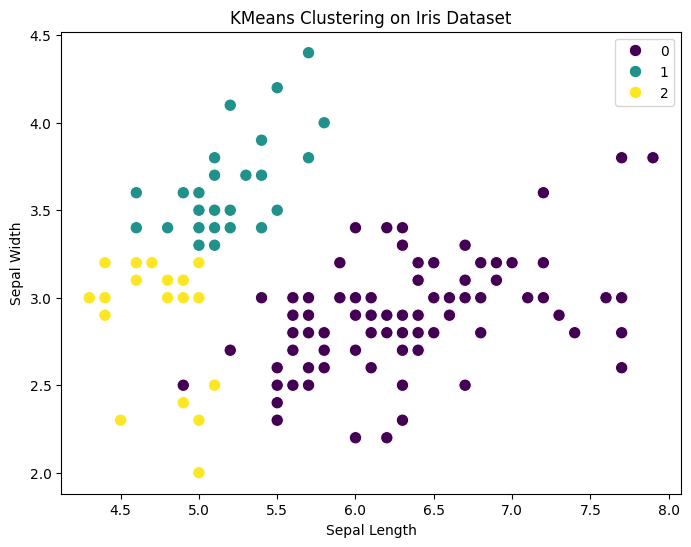

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df.iloc[:, 0],
    y=df.iloc[:, 1],
    hue=kmeans_labels,
    palette="viridis",
    s=80
)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

**Hierarchical Clustering**

**How Hierarchical Clustering Works**

Hierarchical clustering builds clusters in a tree-like structure using:

Agglomerative (bottom-up)

Each point starts as a single cluster

Clusters are merged step-by-step based on distance

Divisive (top-down)

Start with one large cluster

Recursively split into smaller clusters

Agglomerative clustering is commonly used.

**Why Hierarchical clustering suits the Iris dataset**

Iris dataset has small size → hierarchical clustering works well

Produces a dendrogram to visualize natural cluster structure

No need to specify number of clusters initially (dendrogram reveals it)

Hierarchical Dendrogram

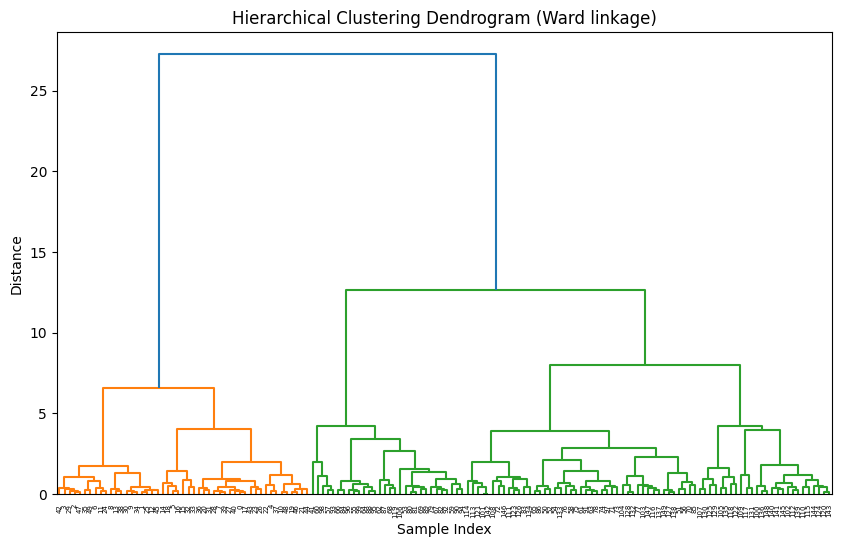

In [6]:
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Apply Hierarchical Clustering

In [7]:
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier.fit_predict(df_scaled)

df['HierCluster'] = hier_labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster,HierCluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,2,1
2,4.7,3.2,1.3,0.2,2,1
3,4.6,3.1,1.5,0.2,2,1
4,5.0,3.6,1.4,0.2,1,1


Visualize Hierarchical Clusters

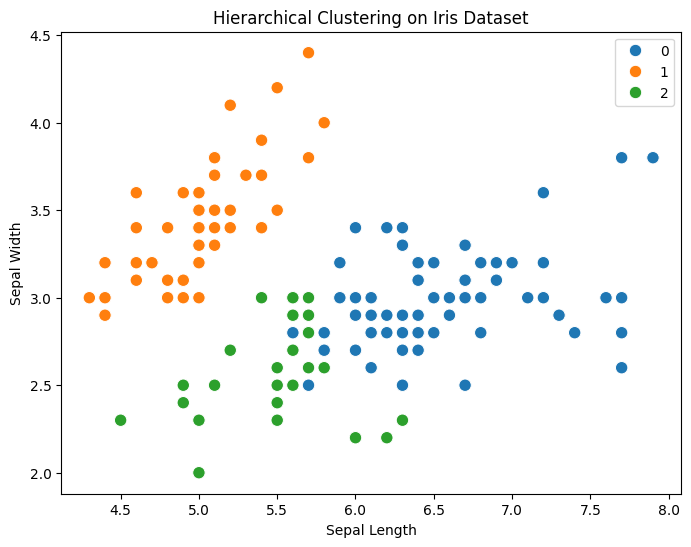

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df.iloc[:, 0],
    y=df.iloc[:, 1],
    hue=hier_labels,
    palette="tab10",
    s=80
)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()